In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('BlackFriday.csv')

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [8]:
del df['Product_Category_2']
del df['Product_Category_3']

In [9]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [10]:
df['User_ID'].nunique()

5891

In [11]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [12]:
df['Product_ID'].nunique()

3623

In [13]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [14]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
df['Occupation'].nunique()

21

In [16]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [17]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [18]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [19]:
df['Purchase'].mean()

9333.859852635065

In [20]:
for column in df.columns:
    print(df[column].nunique(), "\t:",column)

5891 	: User_ID
3623 	: Product_ID
2 	: Gender
7 	: Age
21 	: Occupation
3 	: City_Category
5 	: Stay_In_Current_City_Years
2 	: Marital_Status
18 	: Product_Category_1
17959 	: Purchase


In [21]:
Data=pd.DataFrame({'Ratio':[len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]},index =['Male','Female'])

In [22]:
Data

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

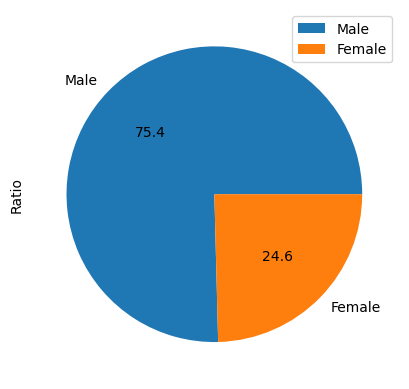

In [23]:
Data.plot.pie(y='Ratio',autopct = '%.1f')

<Axes: title={'center': 'Gender Ratio'}>

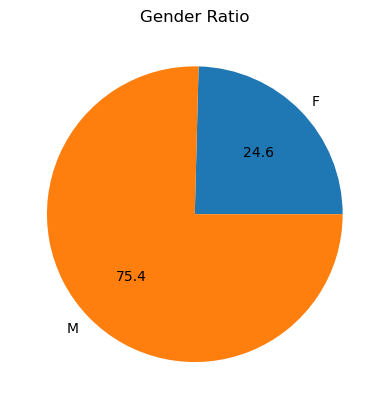

In [24]:
df.groupby('Gender').size().plot(kind = 'pie',
                                 autopct = '%.1f',
                                 title = 'Gender Ratio')

<Axes: title={'center': 'Gender Ratio'}, xlabel='Gender'>

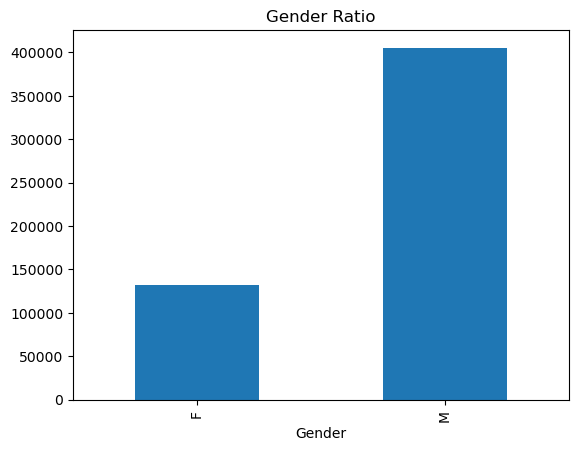

In [25]:
df.groupby('Gender').size().plot(kind = 'bar',
                                 title = 'Gender Ratio')

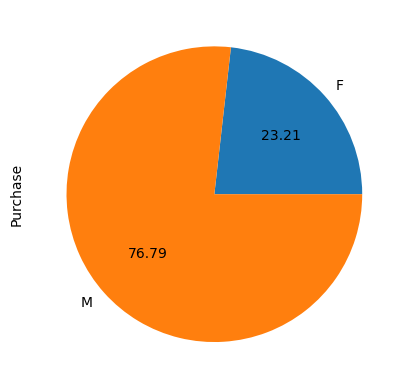

In [26]:
df.groupby('Gender')['Purchase'].sum().plot(kind='pie',
                                            autopct="%.2f")
plt.show()

<Axes: title={'center': 'Average purchase'}, ylabel='Purchase'>

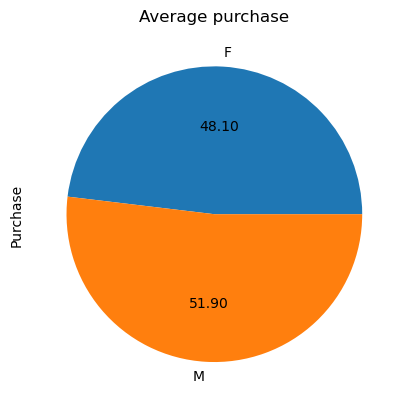

In [27]:
df.groupby('Gender')['Purchase'].mean().plot(kind='pie',
                                            autopct="%.2f",
                                            title= 'Average purchase')

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

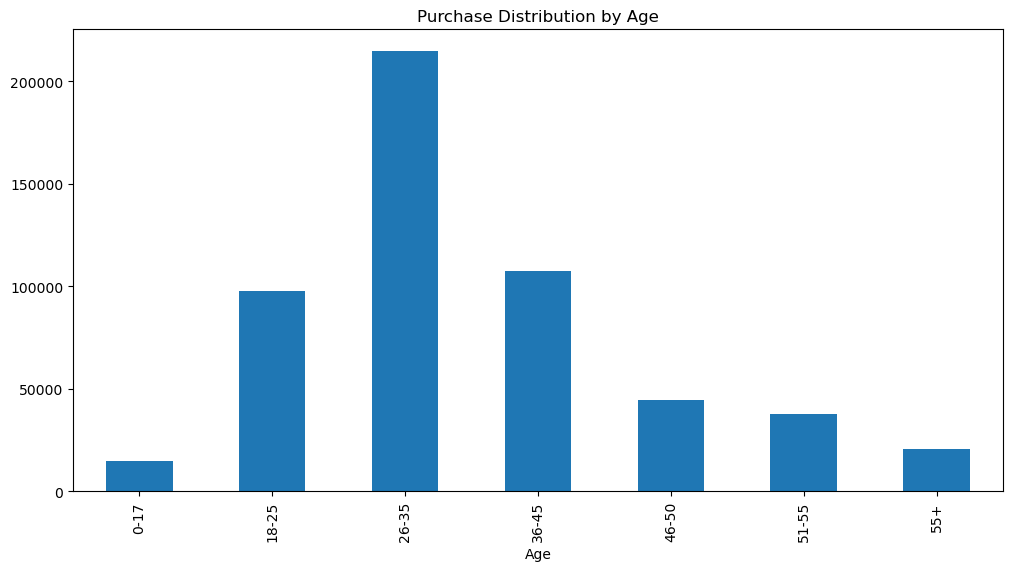

In [28]:
df.groupby('Age').size().plot(kind= 'bar', figsize =(12,6), title = 'Purchase Distribution by Age')

In [29]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age'] == i]['Product_ID'].nunique()])

data=pd.DataFrame(lst,columns=['Age','Products'])

In [30]:
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

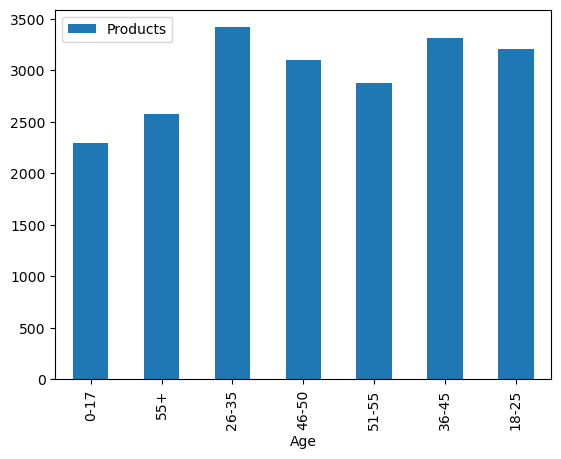

In [31]:
data.plot.bar(x='Age')

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

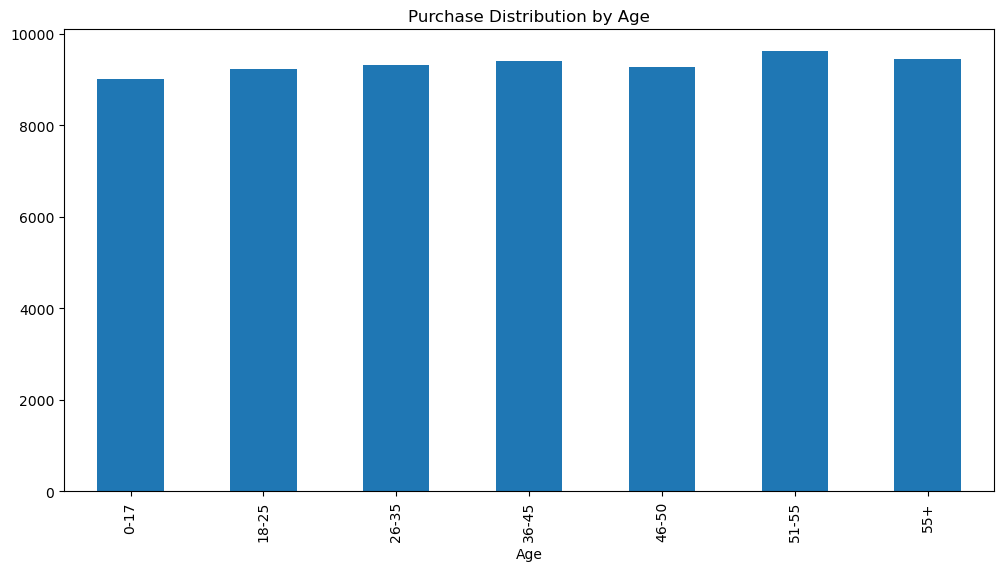

In [32]:
df.groupby('Age')['Purchase'].mean().plot(kind= 'bar', figsize =(12,6), title = 'Purchase Distribution by Age')

<Axes: title={'center': 'Purchase Distribution by Age'}>

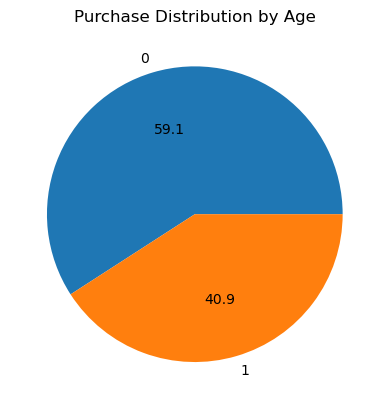

In [33]:
df.groupby('Marital_Status').size().plot(kind= 'pie',  title = 'Purchase Distribution by Age',autopct='%.1f')

<Axes: xlabel='Age', ylabel='count'>

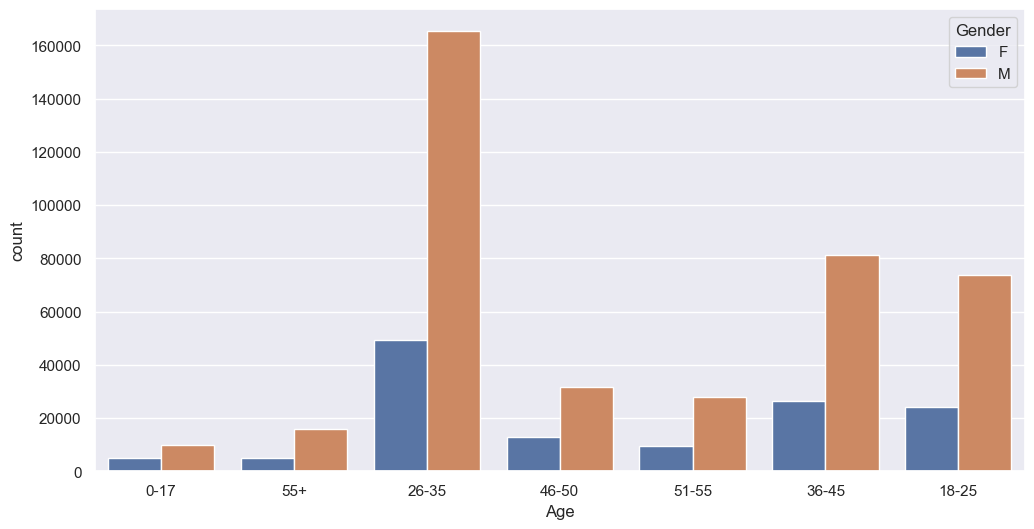

In [34]:
sns.set(rc={'figure.figsize': (12, 6)})
sns.countplot(x = 'Age', hue= 'Gender', data = df )

<Axes: xlabel='Gender', ylabel='count'>

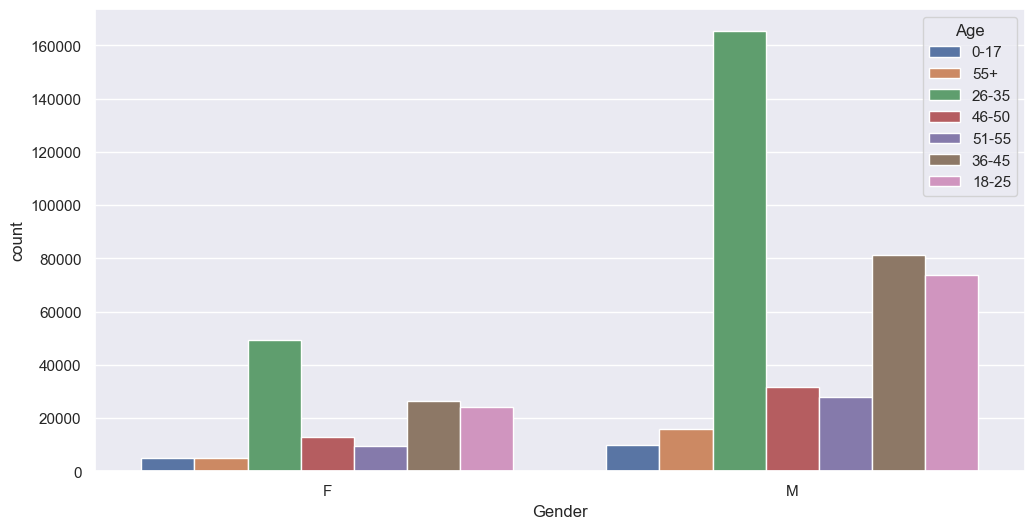

In [35]:
sns.set(rc={'figure.figsize': (12, 6)})
sns.countplot(x = 'Gender', hue= 'Age', data = df )

<Axes: xlabel='City_Category', ylabel='count'>

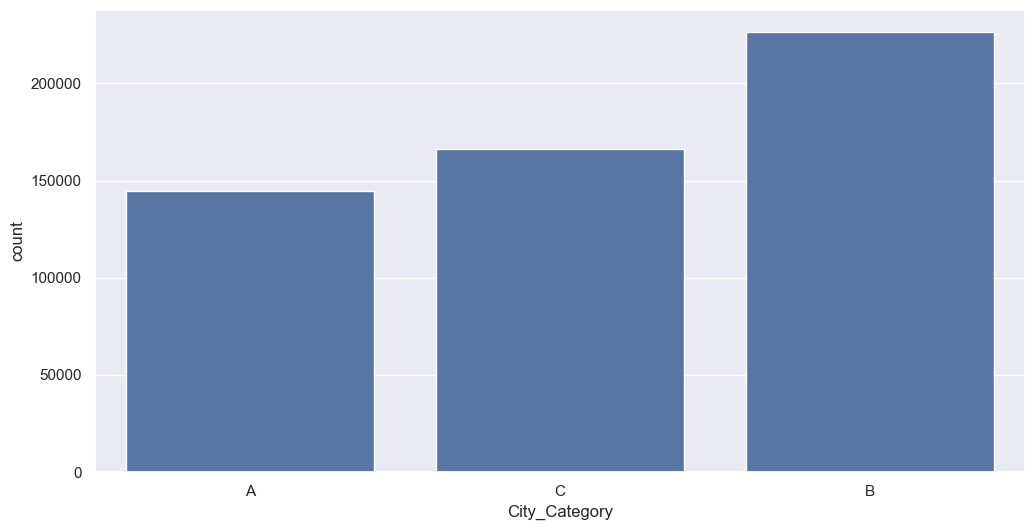

In [36]:
sns.countplot(x= df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

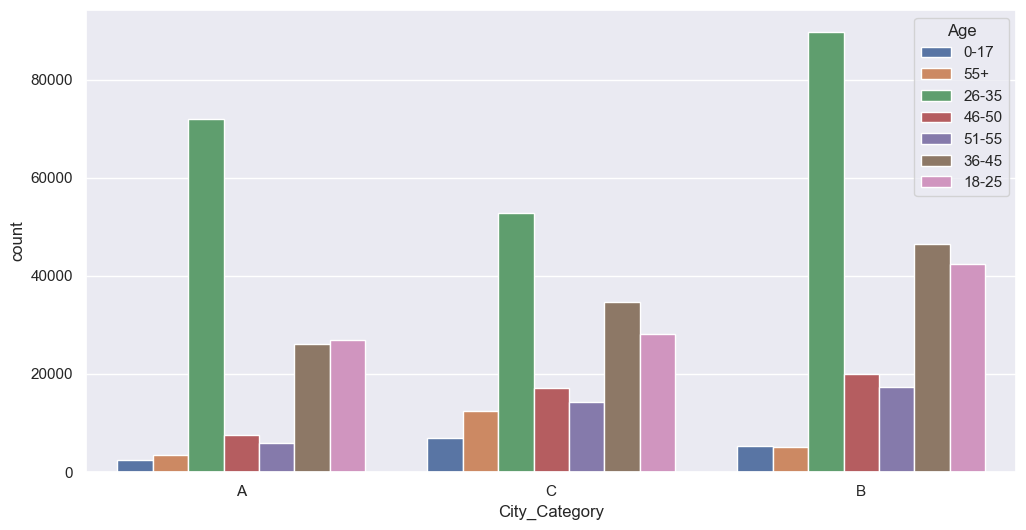

In [38]:
sns.countplot(x= df['City_Category'] , hue='Age',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

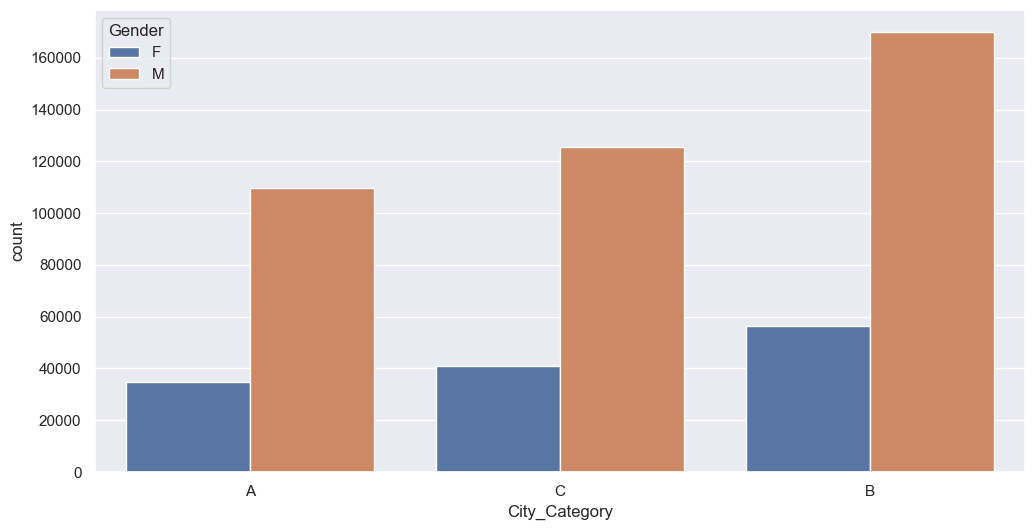

In [39]:
sns.countplot(x= df['City_Category'],hue = 'Gender',data=df )

<Axes: >

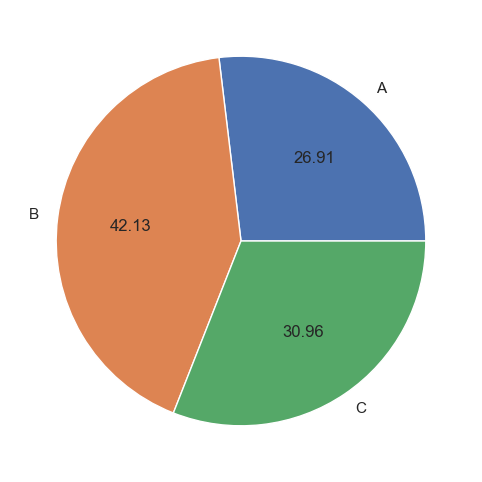

In [37]:
df.groupby('City_Category').size().plot(kind= 'pie',autopct =  '%.2f')

<Axes: ylabel='Purchase'>

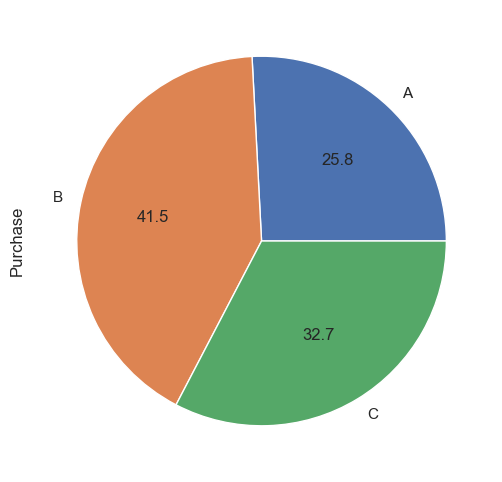

In [40]:
df.groupby('City_Category')['Purchase'].sum().plot(kind = 'pie',autopct='%0.1f')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

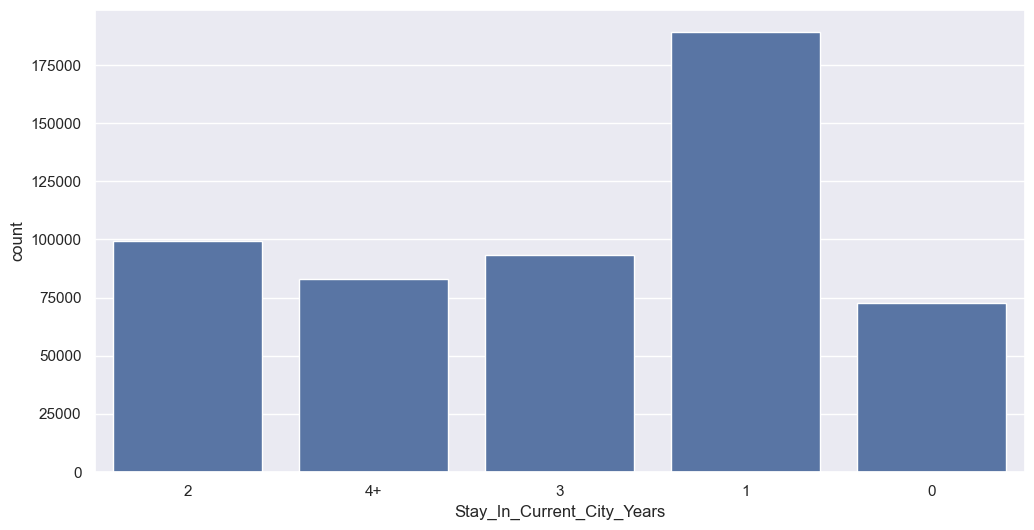

In [80]:
sns.countplot(x=df['Stay_In_Current_City_Years'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

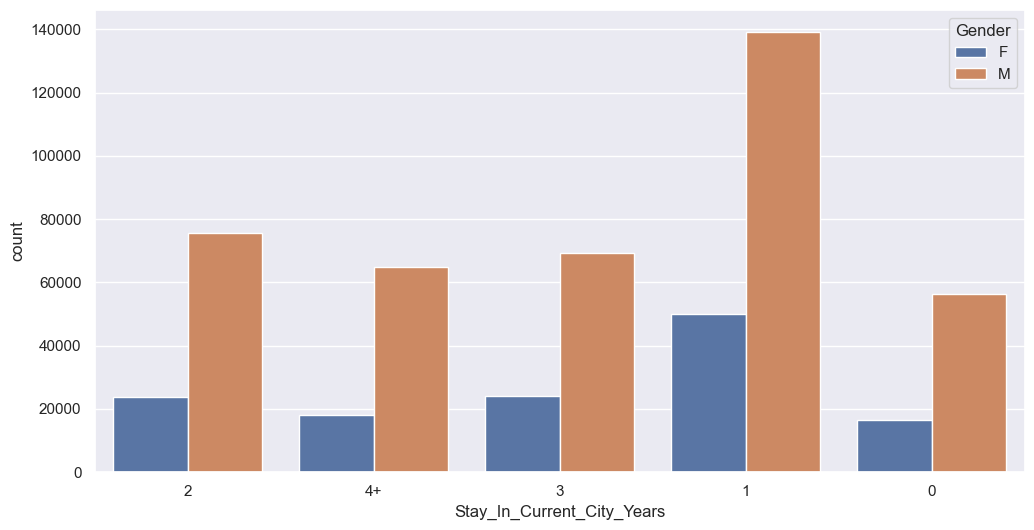

In [82]:
sns.countplot(x=df['Stay_In_Current_City_Years'], hue='Gender',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

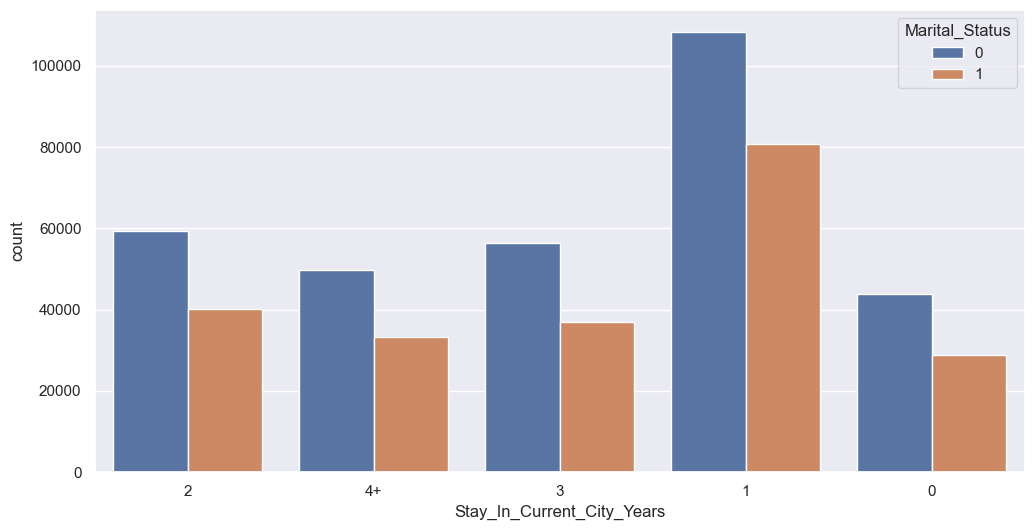

In [86]:
sns.countplot(x=df['Stay_In_Current_City_Years'], hue='Marital_Status',data=df)

<Axes: >

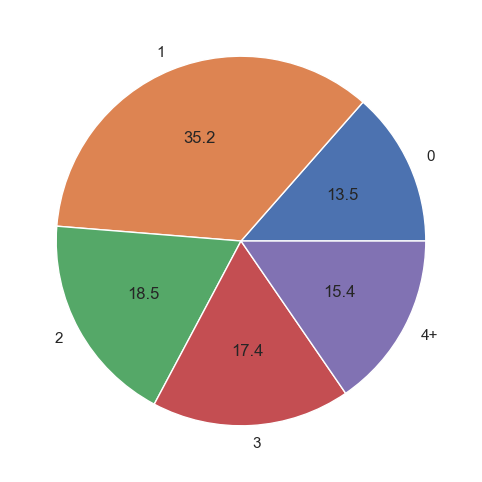

In [88]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie',autopct='%.1f')

<Axes: ylabel='Purchase'>

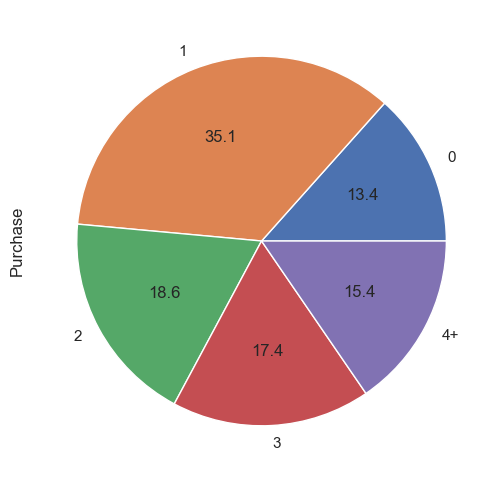

In [92]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind = 'pie',autopct='%.1f')

<Axes: xlabel='Stay_In_Current_City_Years'>

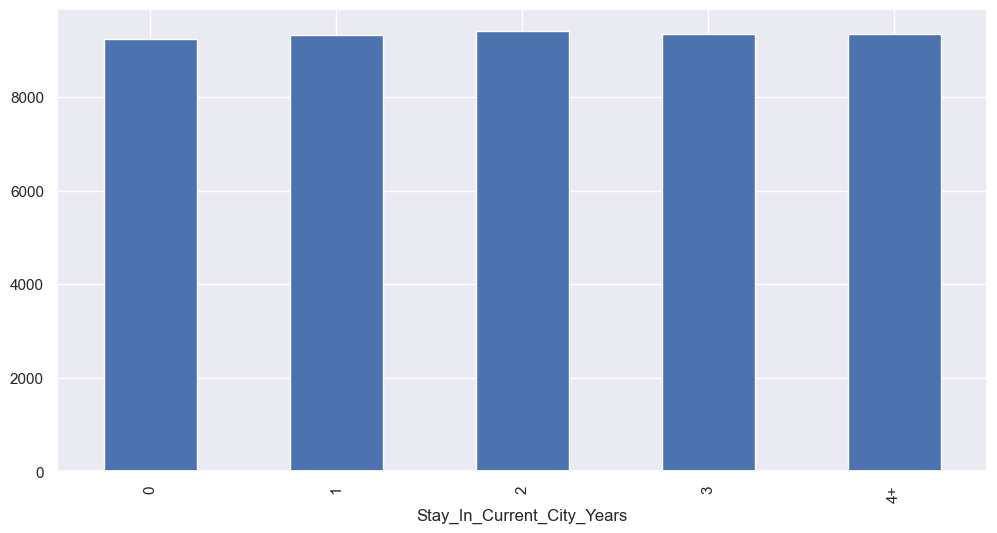

In [94]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

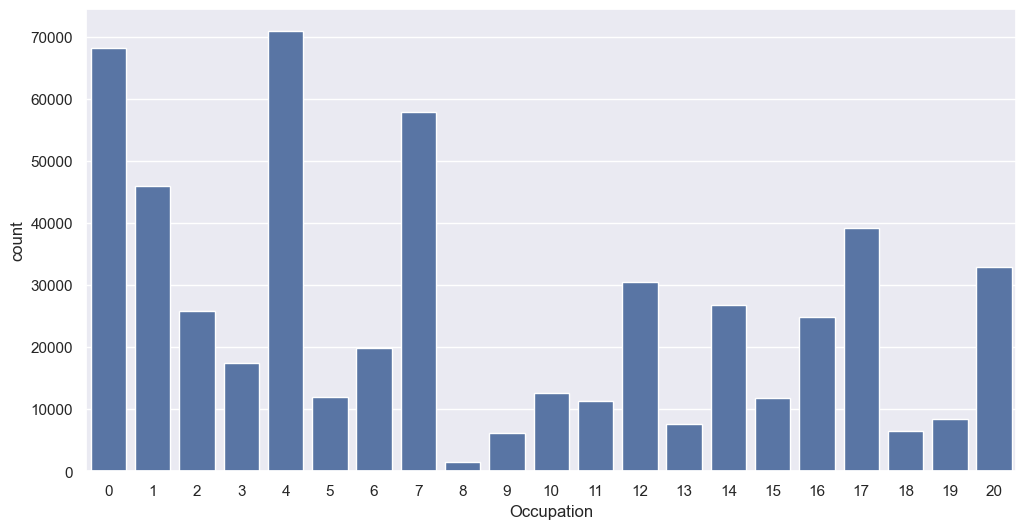

In [96]:
sns.countplot(x=df['Occupation'])

<Axes: xlabel='Occupation'>

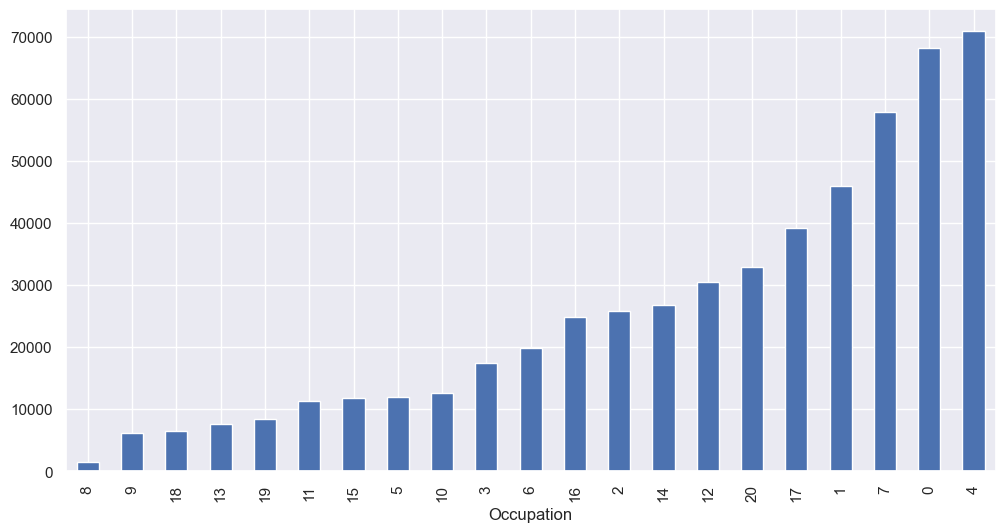

In [104]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

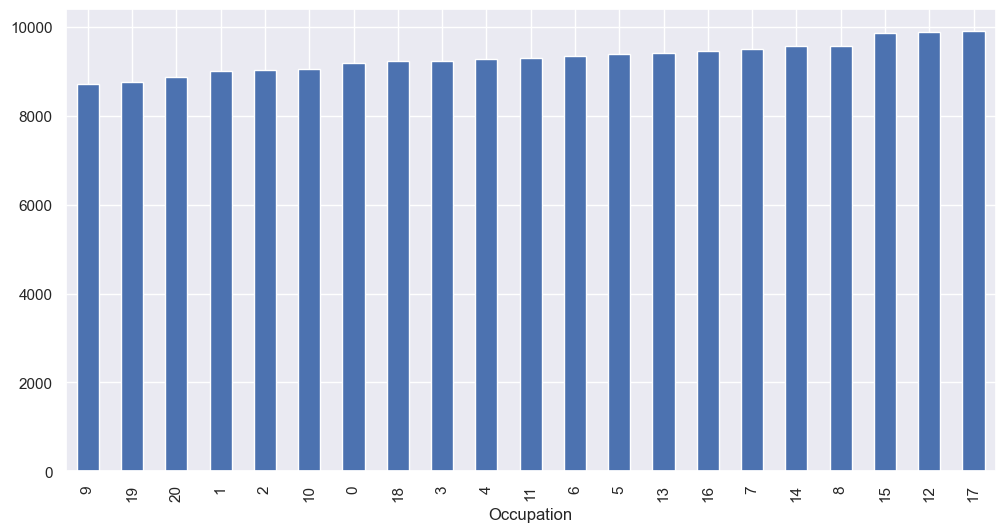

In [106]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind = 'bar')

In [110]:
df.groupby('Occupation')['Purchase'].mean().sort_values()

Occupation
9     8714.335934
19    8754.249162
20    8881.099514
1     9017.703095
2     9025.938982
10    9052.836410
0     9186.946726
18    9233.671418
3     9238.077277
4     9279.026742
11    9299.467190
6     9336.378620
5     9388.848978
13    9424.449391
16    9457.133118
7     9502.175276
14    9568.536426
8     9576.508530
15    9866.239925
12    9883.052460
17    9906.378997
Name: Purchase, dtype: float64

<Axes: xlabel='Occupation', ylabel='count'>

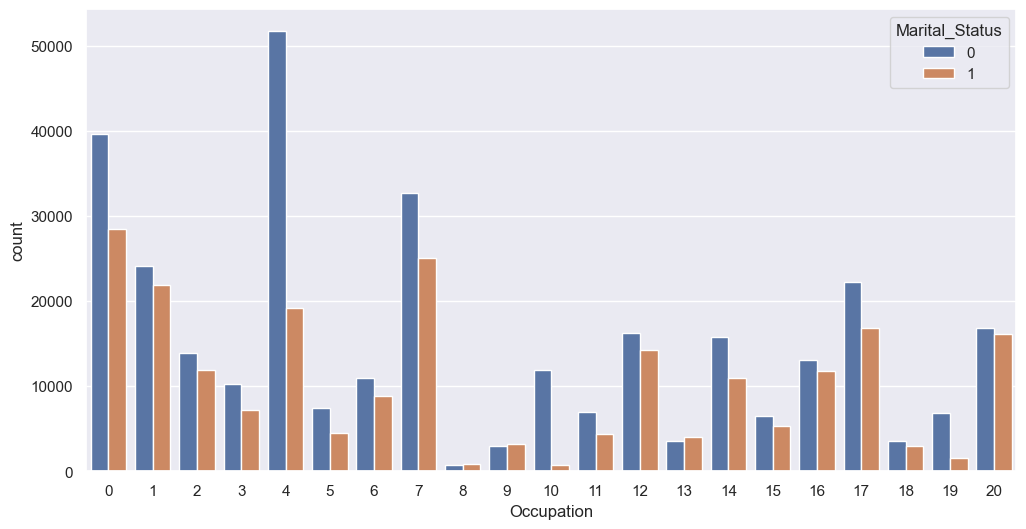

In [112]:
sns.countplot(x='Occupation' , hue = 'Marital_Status',data=df)

<Axes: xlabel='Occupation', ylabel='count'>

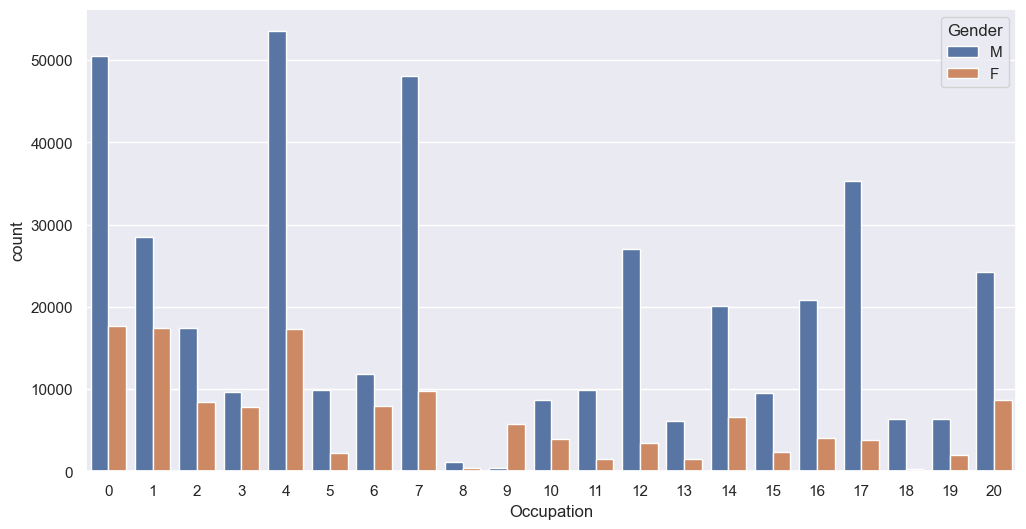

In [114]:
sns.countplot(x='Occupation' , hue = 'Gender',data=df)

<Axes: xlabel='Occupation'>

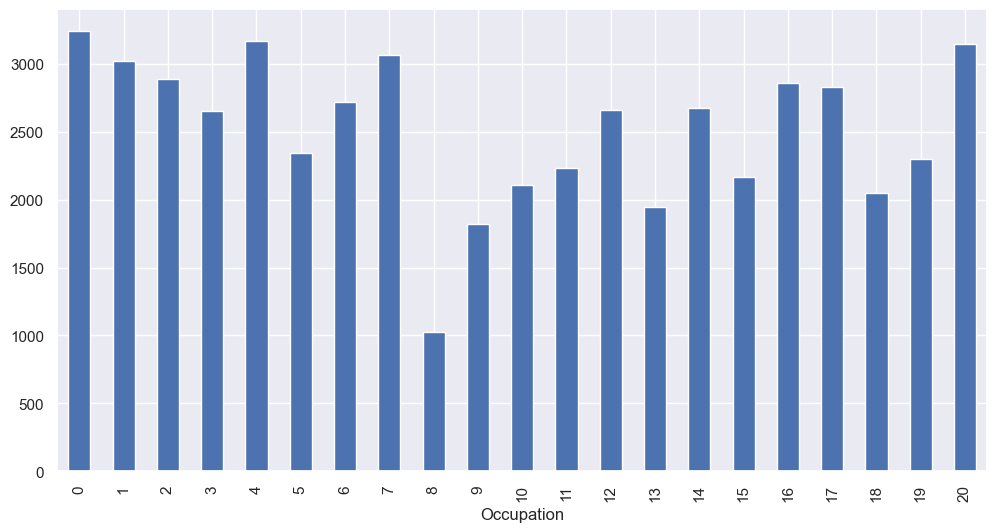

In [116]:
df.groupby('Occupation').nunique()['Product_ID'].plot(kind = 'bar')

<Axes: xlabel='Occupation'>

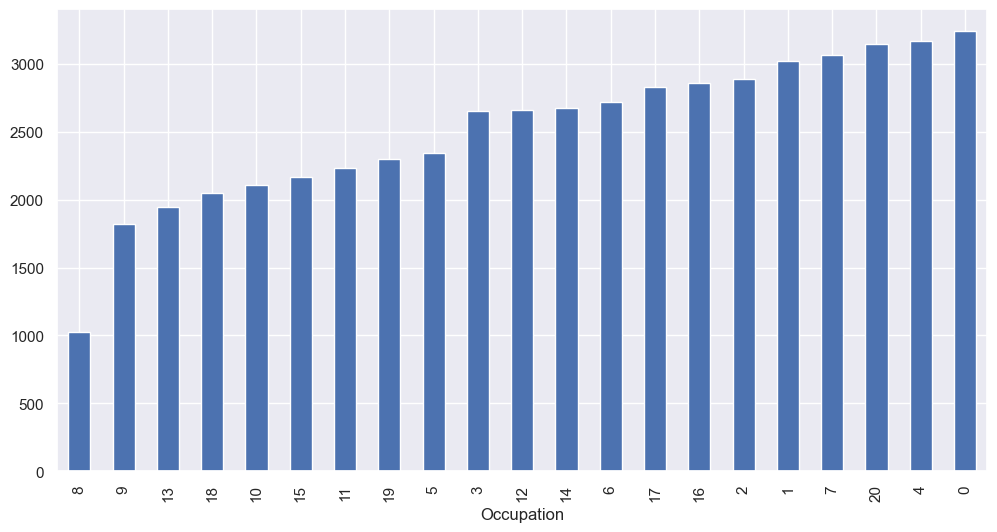

In [120]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

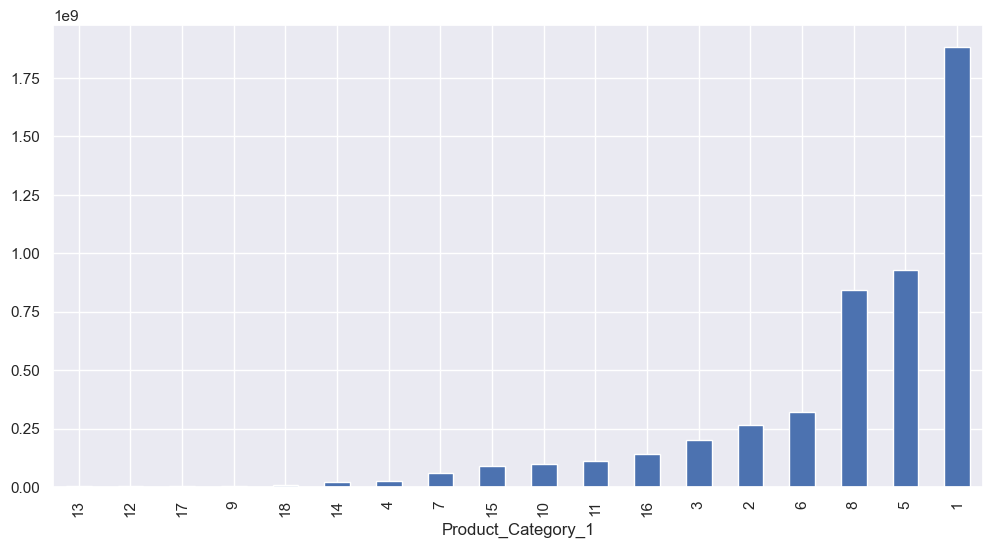

In [122]:
 df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

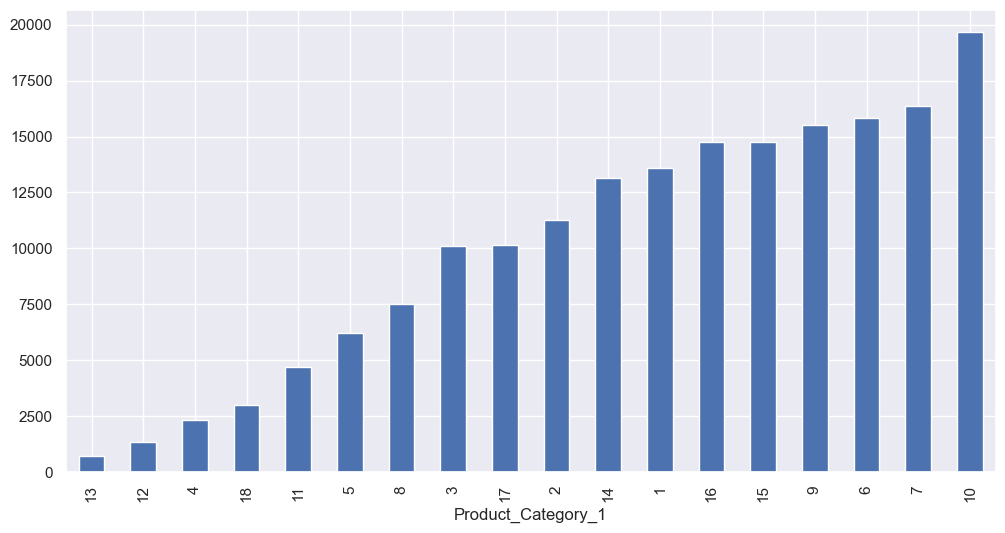

In [126]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

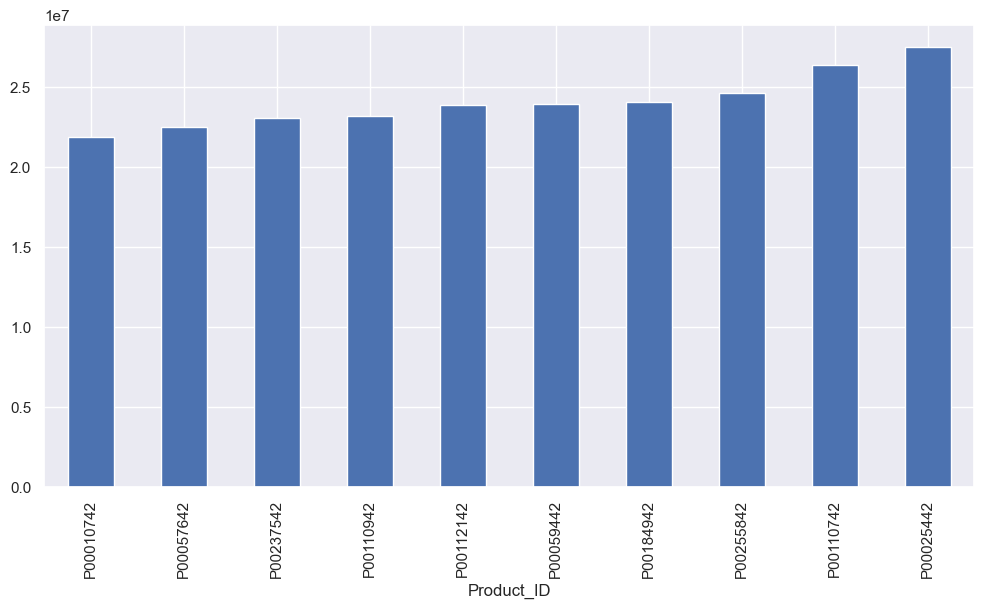

In [132]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind='bar')


<Axes: xlabel='Product_Category_1', ylabel='count'>

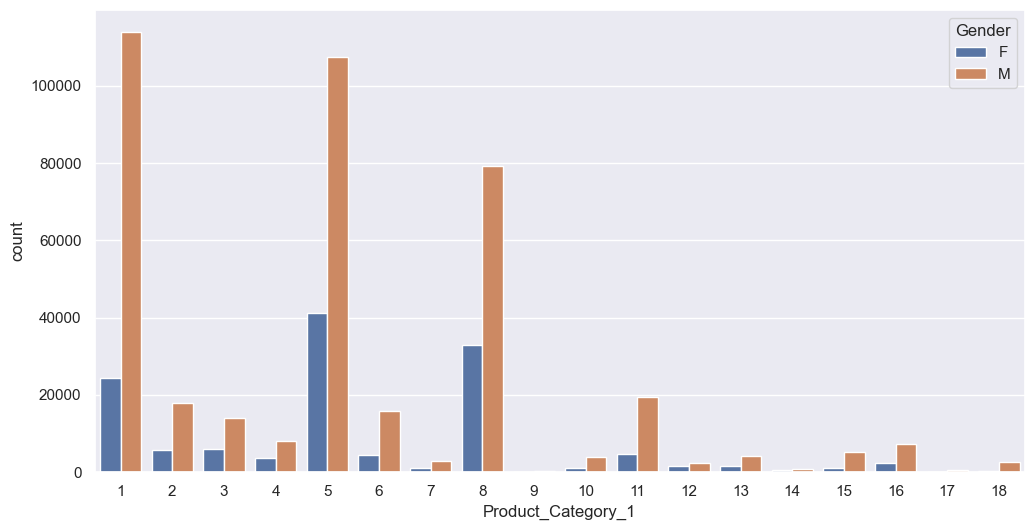

In [134]:
sns.countplot(x='Product_Category_1',hue='Gender',data= df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

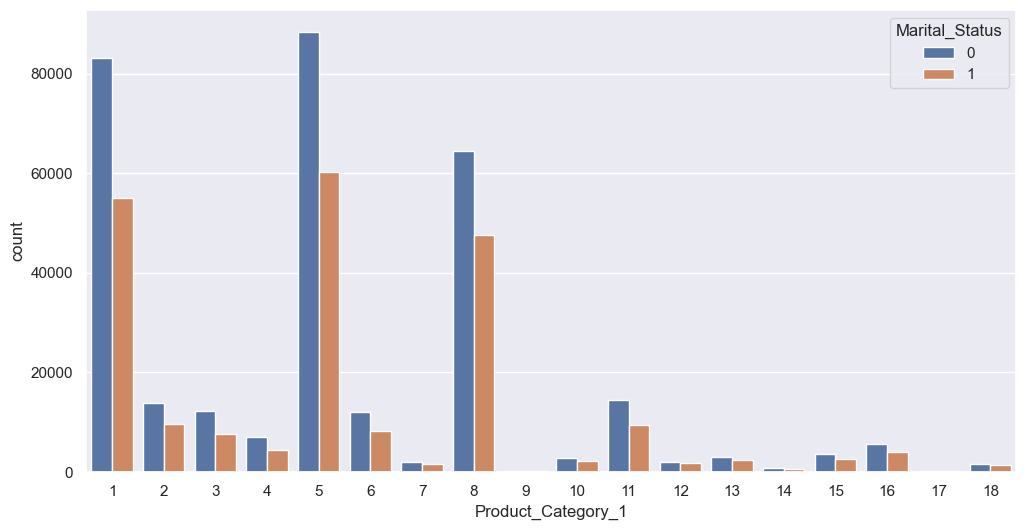

In [136]:
sns.countplot(x='Product_Category_1',hue='Marital_Status',data= df)

In [138]:
lst=[]
for i in range (len(df)):
    lst.append(df['Gender'][i]+'_'+str(df['Marital_Status'][i]))

df['MaritalGender']=lst

In [140]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

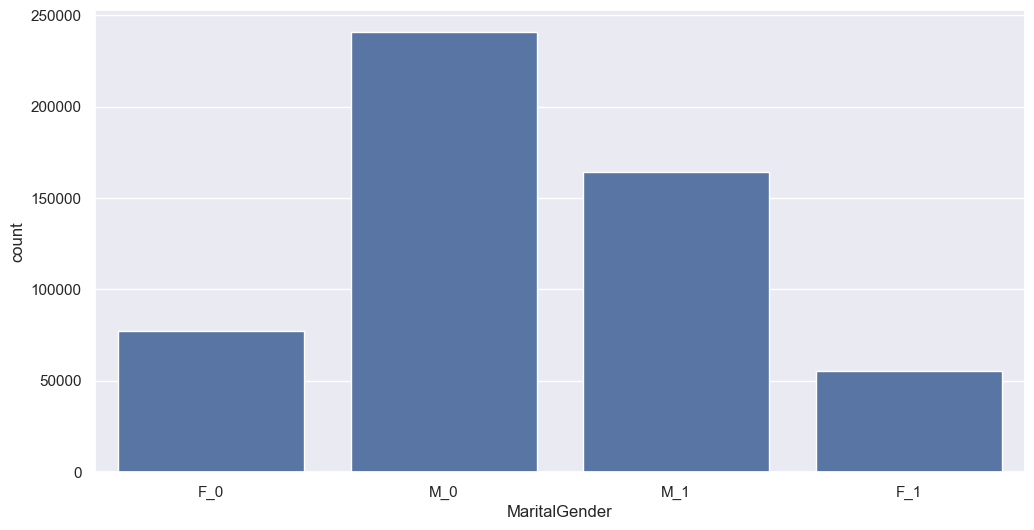

In [144]:
sns.countplot(x= df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

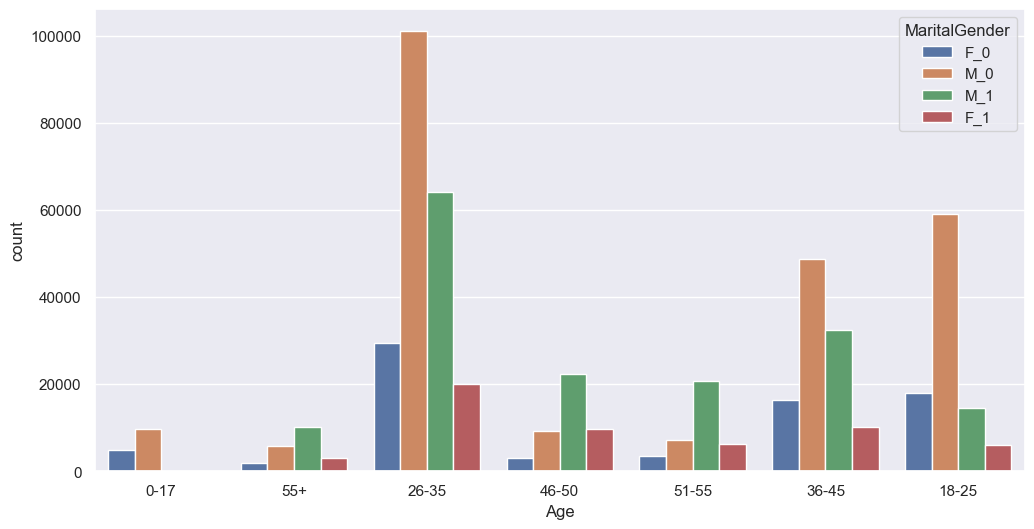

In [146]:
sns.countplot(x= df['Age'],hue=df['MaritalGender'],data= df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

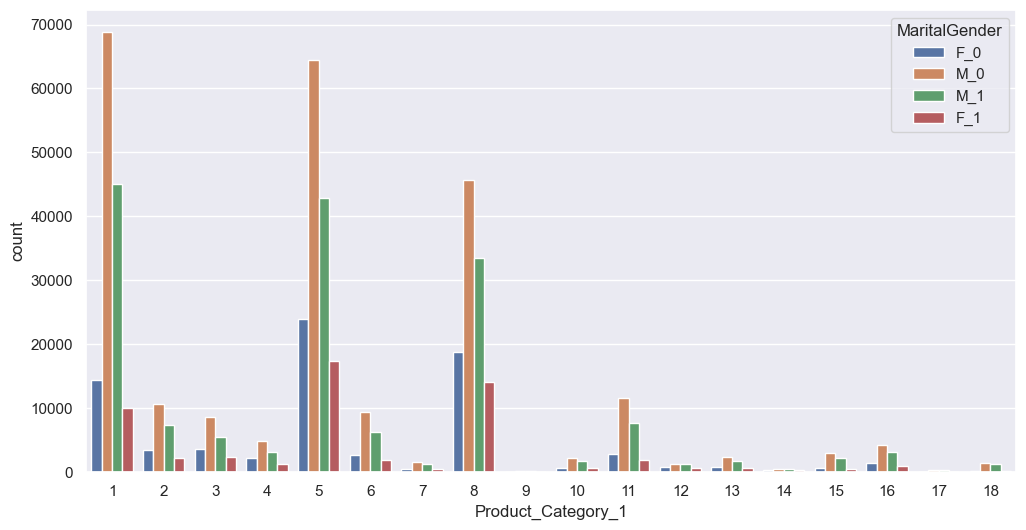

In [150]:
sns.countplot(x= df['Product_Category_1'],hue=df['MaritalGender'],data= df)

<Axes: xlabel='City_Category', ylabel='count'>

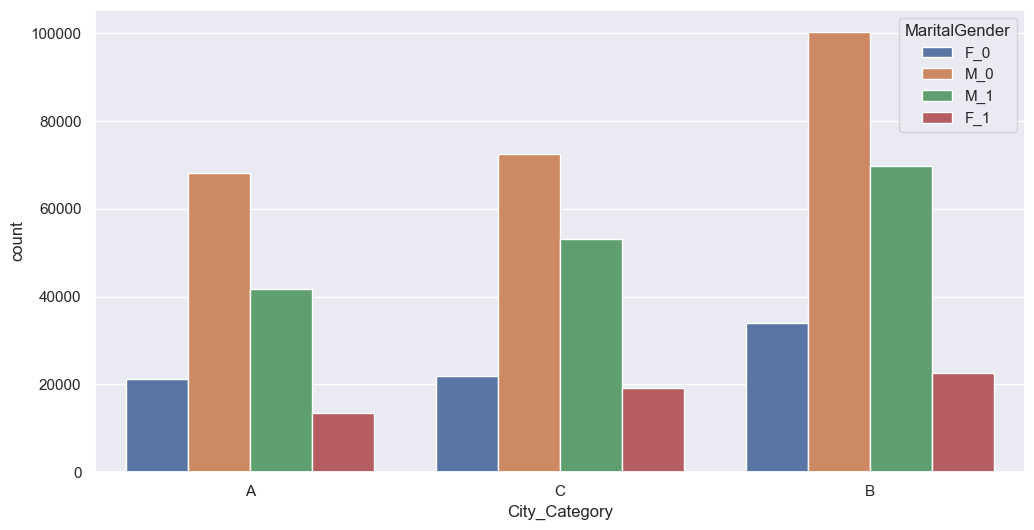

In [152]:
sns.countplot(x= df['City_Category'],hue=df['MaritalGender'],data= df)